# I. Business Understanding
A sneak peek into the Airbnb activity in Boston, MA, USA [Kaggle Link](https://www.kaggle.com/datasets/airbnb/boston)

#### Questions:

- What's the Average Price of listings per Neighborhood?
- What's the Average Rating of listings per Neighborhood?
- What are the Top amenities offered for the listings?
- What's the Average Price as per the Type of Property?
- What's the Average Price as per the Room Type
- How is the Distribution of Listings as per RoomType?
- Who are the Hosts with most listings?
- Which Neighborhoods have with most listings?

# II. Data Understanding


- listings.csv : Including full descriptions and average review score
- #### import packages, read listings.csv

### Gather Data: 
- Here, we would first try and get an idea of how the data set looks like, this is done using the pandas read_csv() function that accepts the the path to the listings.csv file as an input and save it in variable df, and print top few rows of the csv using .head() funtion that works on the variable (df) of type DataFrame  



In [57]:
#Import packages for data manipulation and plotting:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud 


#Reading the csv with the Listing Details of the Houses listed on Boston Airbnb 
df = pd.read_csv('./listings.csv')

print("Number of Rows: {} and Number of Columns: {}".format(df.shape[0], df.shape[1]))
df.head()


Number of Rows: 3585 and Number of Columns: 95


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


# III. Prepare Data

- #### Identify missing values on the Price Column


- Firstly, to do any analysis on the Price column (since few of the Business Questions include computing average price), it's imperative to identify if there are any missing values on the price column, this is done by counting NA rows using the function isna(). For the current dataset, there are no missing values found in any rows, hence in the following code block, the 'else' section is executed always. Had it been there were any missing values, the control would have been assigned to 'if' condition and later there would have a decision point to decide how many row values were missing using isnull().sum() aggregate function




In [58]:
# print(df['price'].isna().sum() )

if df['price'].isna().sum() > 0:
    df.dropna(subset=['price'], how='any')  
    print("Number of null values in Price column: {}".format(df['price'].isnull().sum()))  
else:
    print ("No null values found on price column")


No null values found on price column


### Clean data : Price Column

- Cleaning the price column palys an important role for this project, since currently price value is of the type a String and we cannot get the mean (Average) of a String for our further study.


- This achieved by so replacing the dollar sign and the comma with blank value by using a lambda function along with the .replace() String manipulation function.


- This gives us the price in a numeric form as follows:
250.0
65.0 
65.0 
75.0 
79.0 and so on


In [59]:
print("Now cleaning Price Column, since $ and , make the price string and we cannot get the mean of the String for our further study, so replacing $ and , with blank") 
    
# reference: https://sparkbyexamples.com/pandas/pandas-replace-string-examples/
df['price'] = df['price'].apply(lambda x : (x.replace('$','').replace(',','')))
df['price'] = df['price'].astype(float)
df['price'].head()

Now cleaning Price Column, since $ and , make the price string and we cannot get the mean of the String for our further study, so replacing $ and , with blank


0    250.0
1     65.0
2     65.0
3     75.0
4     79.0
Name: price, dtype: float64

### Clean data : Amenities Column

- All listings have their own set of Amenities, a few Amenities are common for all most listings while few amenities are unique per listings and are provided as enclosed sets, comma separated, and mostly enclosed in quotes

- In order to answer the Question: What are the Top amenities offered for the listings? We need to first clean the quotes and commas and enclosing braces, and then get get the unique list of amenities with corresponding frequency of that word across all listings. 

- To achieve, there could be multiple ways, however, we'd use string manipualition and perform the following steps:


    - Combine All amenities rows into a single tempString for data cleaning
    - Replace {, }, " to blank
    - Split the string by comma, convert the list to DataFrame
    - by-deafult df columnName is '0', rename it to 'Amenities'

In [71]:
df['amenities'].head(10)

0    {TV,"Wireless Internet",Kitchen,"Free Parking ...
1    {TV,Internet,"Wireless Internet","Air Conditio...
2    {TV,"Cable TV","Wireless Internet","Air Condit...
3    {TV,Internet,"Wireless Internet","Air Conditio...
4    {Internet,"Wireless Internet","Air Conditionin...
5    {"Cable TV","Wireless Internet","Air Condition...
6    {TV,Internet,"Wireless Internet",Kitchen,"Free...
7    {TV,Internet,"Wireless Internet","Air Conditio...
8    {"Wireless Internet","Pets live on this proper...
9    {TV,"Cable TV",Internet,"Wireless Internet","A...
Name: amenities, dtype: object

In [72]:
# Combine All amenities rows into a single tempString for data cleaning

tempString = ' '.join(df['amenities'])

# Replace {, }, " to blank
tempString = tempString.replace("{","").replace("}",",").replace("\"","").replace(" ","")
# print (len(s))
# print(tempString)

# Split the string by comma, convert the list to DataFrame
df_ListOfAmenities = pd.DataFrame(tempString.split(","))
# print(tempString.split(","))

df_ListOfAmenities.columns = ['Amenities']


# by-deafult df columnName is '0', rename it to 'Amenities'
df_ListOfAmenities.columns = ['Amenities']

df_ListOfAmenities.head(10)

,Amenities
0,TV
1,WirelessInternet
2,Kitchen
3,FreeParkingonPremises
4,Petsliveonthisproperty
5,Dog(s)
6,Heating
7,Family/KidFriendly
8,Washer
9,Dryer


# IV. Evaluate the results

The following function displayBarChart is used the reduce the line of code, replacing the repetitive barchart plotting function calls. This function, doesn't return anythin bu itelsef and hence didn't have any defined return types or outputs. 

In [62]:
def displayBarChart(inputDataFrame, xColumnName, yColumnName, figSizeL, figSizeB, xLabel, yLabel, title, yLimAdjust):
    '''
    input: 
            inputDataFrame (String) : Data Frame for which the Bar Chart is to be plotted
            xColumnName (String) : ColumnName on DataFrame that represents X-Axis on BarChart
            yColumnName (String) : ColumnName on DataFrame that represents Y-Axis on BarChart
            figSizeL (int) : BarChart Length
            figSizeB (int) : BarChart Breadth
            xLabel (String) : Label for X-Axis of the BarChart
            yLabel (String) : Label for the Y-Axis of the BarChart
            title (String) : BarChart title 
            yLimAdjust (Boolean) : Helps to decide if there's a need to adjust on the yLim due to close range values
    '''
    
    inputDataFrame.plot.bar(x= xColumnName, y = yColumnName, color ='#ddd0ae', alpha = 1,
                                     ec = 'black', width = 0.5, figsize = (figSizeL,figSizeB))
    if (yLimAdjust):
        plt.ylim(inputDataFrame[yColumnName].min()-5,df_AverageRatingPerNeighborhood[yColumnName].max()+5)

    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.title(title)
    plt.show()



## 1. Average Price of listings per Neighborhood

- The following section helps find the average price of a listing in a neighborhood, this is achieved by using .groupby function used on neighbourhood_cleansed column and using an aggregate .mean() function to obtain the average price and sorted in descending order to receive the highest average price and the corresponding neighborhood. 

- This supported by a BarChart, which is using matplotlib methods through a user-defined funtion  : displayBarChart that is defined under IV. Evaluate the results



     neighbourhood_cleansed       price
21  South Boston Waterfront  306.060241
2               Bay Village  266.833333
13         Leather District  253.600000
1                  Back Bay  240.950331
8                  Downtown  236.459302
6                 Chinatown  232.352113
3               Beacon Hill  224.443299
10                   Fenway  220.393103
23                 West End  209.591837
22                South End  204.349693
5               Charlestown  198.045045
17                North End  195.678322
20             South Boston  187.609195
19                  Roxbury  146.333333
12            Jamaica Plain  138.478134
14    Longwood Medical Area  138.444444
16             Mission Hill  121.967742
9               East Boston  119.153333
4                  Brighton  118.767568
0                   Allston  112.307692
24             West Roxbury  107.108696
18               Roslindale   98.428571
7                Dorchester   91.639405
11                Hyde Park   86.548387


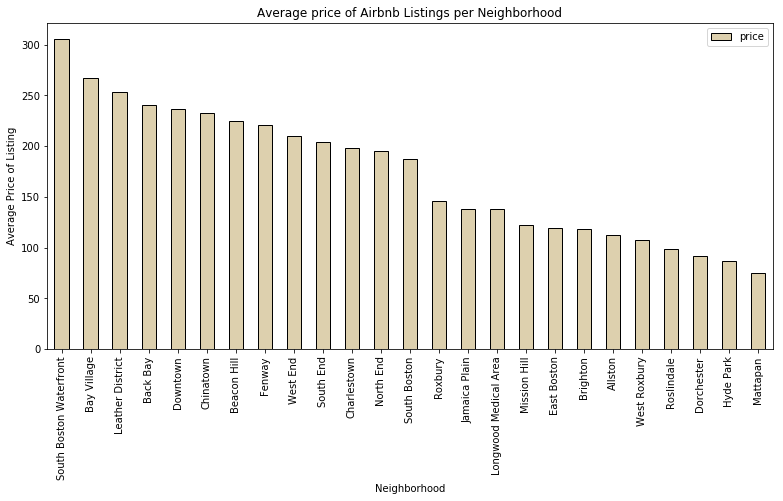

In [63]:

# Reference: https://datascienceparichay.com/article/pandas-groupby-mean/  
# https://www.easytweaks.com/pandas-groupby-to-dataframe/
# https://kanoki.org/2019/09/04/pandas-groupby-tutorial/


df_averagePricePerNeighborhood = df.groupby('neighbourhood_cleansed')['price'].mean().to_frame().reset_index()
df_averagePricePerNeighborhood = df_averagePricePerNeighborhood.sort_values(by=['price'], ascending=False)
print(df_averagePricePerNeighborhood)
# price = df['price']

displayBarChart(df_averagePricePerNeighborhood,'neighbourhood_cleansed', 'price', 13, 6, 'Neighborhood', 'Average Price of Listing', 'Average price of Airbnb Listings per Neighborhood', False)  


### With the above Stats and visualization, we learn that the average price of the property is the highest in the South Boston Waterfront that goes up to USD 306 per day, while the lowest is Mattapan pricing about USD 75 per day.








## 2. Average Rating of listings per Neighborhood


- The following section helps us find the average rating of a listing in a neighborhood, this is achieved by using .groupby function used on neighbourhood_cleansed column and using an aggregate .mean() function to obtain the review_scores_rating and sorted in descending order to receive the highest average rating and the corresponding neighborhood name. 

- This supported by a BarChart, which is using matplotlib methods through a user-defined funtion  : displayBarChart that is defined under IV. Evaluate the results




     neighbourhood_cleansed  Average Rating
13         Leather District       98.333333
18               Roslindale       95.380000
24             West Roxbury       95.212121
21  South Boston Waterfront       94.431034
12            Jamaica Plain       94.159322
14    Longwood Medical Area       94.000000
20             South Boston       93.980392
17                North End       93.725000
5               Charlestown       93.697368
3               Beacon Hill       93.378698
22                South End       93.264925
2               Bay Village       93.000000
8                  Downtown       92.432203
11                Hyde Park       92.280000
6                 Chinatown       92.121951
1                  Back Bay       91.531646
15                 Mattapan       91.000000
4                  Brighton       90.864662
23                 West End       90.333333
9               East Boston       90.272059
0                   Allston       90.164835
19                  Roxbury     

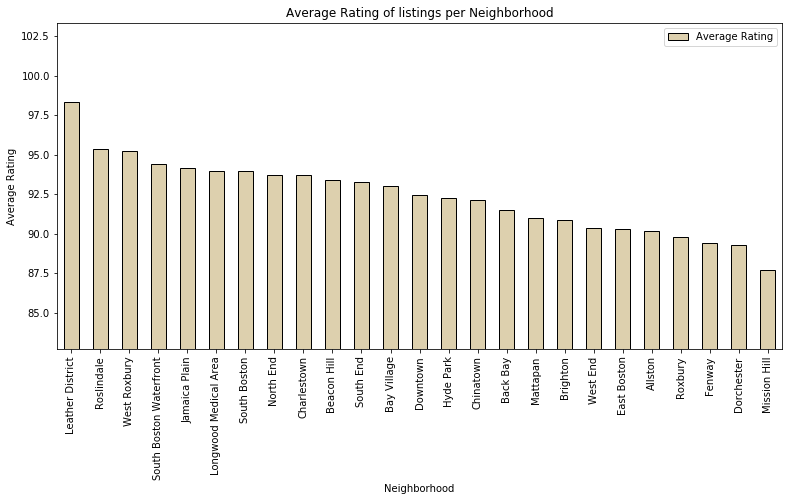

In [64]:
df_AverageRatingPerNeighborhood = df.groupby(['neighbourhood_cleansed'])['review_scores_rating'].mean().reset_index(name='Average Rating').sort_values(by=['Average Rating'], ascending=False)
print(df_AverageRatingPerNeighborhood) 

print(df_AverageRatingPerNeighborhood['Average Rating'].min())

displayBarChart(df_AverageRatingPerNeighborhood,'neighbourhood_cleansed', 'Average Rating', 13, 6, 'Neighborhood', 'Average Rating', 'Average Rating of listings per Neighborhood', True)  


### In this section, we did get a chance to take a look at what’s the average customer rating for each neighborhood in Boston. Turns out, Leather District tops the list with an average rating of 98% while Mission Hill has managed the lowest average rating of 87%

## 3. Top amenities offered for the listings

- The following section helps us find the top amenities offered for the listings, this is achieved by using .groupby function used on Amenities column of df_ListOfAmenities (Computed in Data Cleaning Section)  and using an aggregate .count() function to obtain the Amenity count and sorted in descending order to receive the highest count and the corresponding Amenity. 

- This is followed by a word cloud for eay visualization of top amenities

<bound method NDFrame.head of                                    Amenities  Count
43                          WirelessInternet   3421
21                                   Heating   3384
26                                   Kitchen   3284
12                                Essentials   2994
36                             SmokeDetector   2911
2                            AirConditioning   2821
39                                        TV   2607
24                                  Internet   2577
10                                     Dryer   2476
40                                    Washer   2475
6                     CarbonMonoxideDetector   2442
35                                   Shampoo   2421
20                                   Hangers   1985
13                        Family/KidFriendly   1888
27                   LaptopFriendlyWorkspace   1834
25                                      Iron   1828
19                                 HairDryer   1811
5                                 

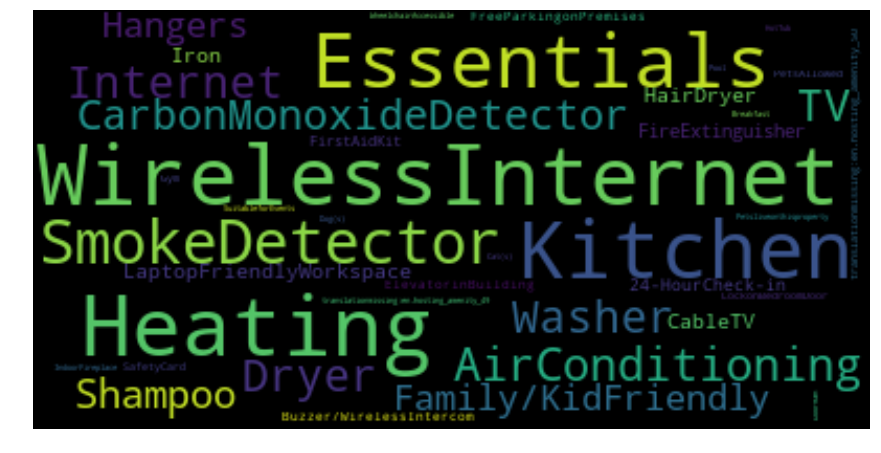

In [65]:
# Group by amenities to obtain the count of each amenity
df_ListOfAmenities = df_ListOfAmenities.groupby(['Amenities'])['Amenities'].count().reset_index(name='Count').sort_values(by=['Count'], ascending=False)

print(df_ListOfAmenities.head)

# Creating a tempDicitonary to to display a word cloud of top amenities offered 

tempDictionary = {}
for a, x in df_ListOfAmenities.values:
    tempDictionary[a] = x

# import matplotlib.pyplot as plt
# from wordcloud import WordCloud
# Reference : https://www.datacamp.com/tutorial/wordcloud-python

wordcloud = WordCloud(max_font_size=40, max_words=2000, background_color="black")
# wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies = tempDictionary)
plt.figure( figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()





### Here, we evaluated about what are the most common amenities that are offered across the listings. Wireless Internet is the most common amenity provided by almost 95% of the properties listed. Below is the table that gives us a quick glance on the most common amenities

## 4. Average Price as per the Type of Property

- The following section helps us find the average Price as per the Type of Property, this is achieved by using .groupby function used on property_type column and using an aggregate .mean() function to obtain the price and sorted in descending order to receive the highest average price and the corresponding property type. 

- This supported by a BarChart, which is using matplotlib methods through a user-defined funtion  : displayBarChart that is defined under IV. Evaluate the results



      property_type       price
7        Guesthouse  289.000000
2              Boat  268.833333
10            Other  229.941176
4       Condominium  190.246753
12            Villa  189.500000
9              Loft  185.410256
0         Apartment  181.966692
11        Townhouse  149.037037
8             House  131.599644
1   Bed & Breakfast  129.365854
6      Entire Floor  122.000000
5              Dorm   62.500000
3         Camper/RV   60.000000


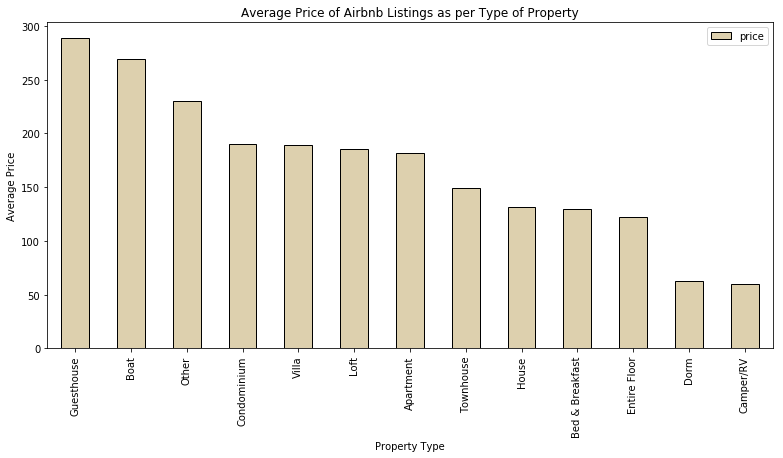

In [66]:
df_propertyTypeAndPrice = df.groupby(['property_type'])['price'].mean().to_frame().reset_index().sort_values(by=['price'], ascending=False)
print(df_propertyTypeAndPrice)   

displayBarChart(df_propertyTypeAndPrice,'property_type', 'price', 13, 6, 'Property Type', 'Average Price', 'Average Price of Airbnb Listings as per Type of Property', False)  



### Type of property also plays an important role to decide on the price of the listing, with the analysis, it was observed that Guest House type of properties have the highest average price of USD 289 per day, on the other hand, Camper/RV is the lowest at USD 60 per day.

## 5. Average Price as per the Room Type

- The following section helps us find the average Price as per the Type of Room, this is achieved by using .groupby function used on room_type column and using an aggregate .mean() function to obtain the price and sorted in descending order to receive the highest average price and the corresponding property type. 

- This supported by a BarChart, which is using matplotlib methods through a user-defined funtion  : displayBarChart that is defined under IV. Evaluate the results


         room_type       price
0  Entire home/apt  227.436765
1     Private room   96.041364
2      Shared room   92.762500


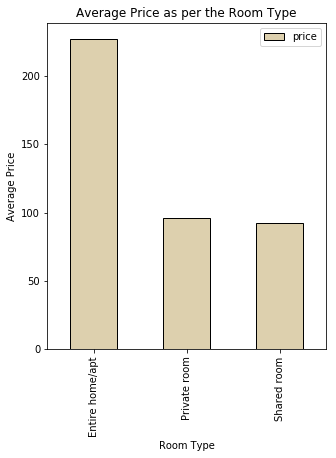

In [67]:
df_roomTypeAndPrice = df.groupby(['room_type'])['price'].mean().to_frame().reset_index().sort_values(by=['price'], ascending=False)
print(df_roomTypeAndPrice) 

displayBarChart(df_roomTypeAndPrice,'room_type', 'price', 5, 6, 'Room Type', 'Average Price', 'Average Price as per the Room Type', False)  



### Room type could be one of the three types Entire home/Apt with an average price USD 227 per day, Private room with an average price USD 96 per day and Shared Room with an average price USD 93 per day.

## 6. Distribution of Listings as per RoomType

- The following section helps us find the Distribution of Listings as per the Type of Room, this is achieved by using .groupby function used on room_type column and using an aggregate .count() function to obtain the count and sorted in descending order to receive the highest count and the corresponding room type. 

- This supported by a PieChart for better visualization, which is using matplotlib methods

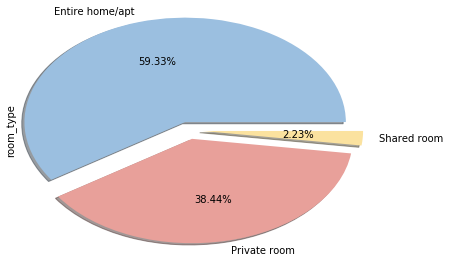

In [68]:
df_roomTypeAndCount = df.groupby(['room_type'])['room_type'].count().reset_index(name='Count').sort_values(by=['Count'], ascending=False)
# print(roomTypeAndPrice)
colors = ['#9BBFE0', '#E8A09A', '#FBE29F']
myExplode = [0.1, 0.1, 0.1]

#Display Pie Chart
plt.axis("auto")
df.groupby(['room_type'])['room_type'].count().plot(kind = 'pie', explode = myExplode, autopct= '%0.2f%%',
                    colors = colors, shadow=True, radius = 1.2)





### Out of the total number of listings listed on the Boston-Airbnb, approximately 59.33% of the listings are Entire home/Apt, followed by 38.44% for Private room and merely 2.23% share for Shared Rooms.

## 7. Hosts with most listings (Only considering Hosts having 10 or more listings)

- The following section helps us find the hosts with most listings , this is achieved by using .groupby function used on host_id column (groupby is applied on host_id instead of host_name, since host_id is unique while 2 hosts can have same names) and using an aggregate .count() function to obtain the count of properties each host owns and sorted in descending order to receive the highest count and the corresponding host name. 

- This supported by a BarChart, which is using matplotlib methods through a user-defined funtion  : displayBarChart that is defined under IV. Evaluate the results

       host_id        host_name  Count
1343  30283594             Kara    136
6        25188         Seamless     79
646    9419684             Mike     61
765   12243051         Flatbook     58
1108  22348222           Alicia     50
418    4962900      Stay Alfred     25
1067  21184200            Paige     24
1246  26956083             Todd     24
174    1444340             Will     24
893   16186589            Marie     20
1398  32532791            Marie     20
112     814298            Brent     19
966   18202088  Beantown Suites     17
901   16442921           Orchid     15
645    9410008            Jason     15
1809  51673899  Harriette Ferne     14
1114  22541573              Ken     13
85      508268          Richard     12
458    5618949             Alan     11
1302  28820575             S.P.     11
1742  48494513       Inn Boston     11


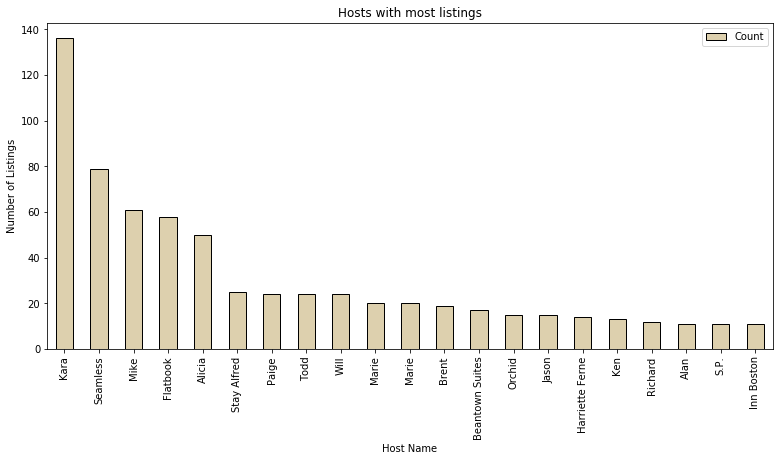

In [69]:
# References
# https://sparkbyexamples.com/pandas/pandas-groupby-count-examples/


df_GroupByHost = df.groupby(['host_id','host_name'])['host_id'].count().reset_index(name='Count').sort_values(by=['Count'], ascending=False)
# df2 = pd.read_csv('./calendar.csv')
# df2.head()

# Only considering Hosts having 10 or more listings
df_GroupByHost = df_GroupByHost[df_GroupByHost['Count'] > 10]  

print(df_GroupByHost)

displayBarChart(df_GroupByHost,'host_name', 'Count', 13, 6, 'Host Name', 'Number of Listings', 'Hosts with most listings', False)  



### It is observed that one host can hold multiple listings, that is, one host can own or is authorized to put more than one listings on Airbnb, in this section, we are getting the names of those Hosts that have more the most listings on Airbnb Boston dataset. Following table, helps us with the specifics of the Hosts that hold the most listings, followed by a bar chart for a visual representation. Kara (Host ID: 30283594) tops the list with 136 listings.

## 8. Neighborhoods with most listings

- The following section helps us find the neighborhoods with most listings , this is achieved by using .groupby function used on neighbourhood_cleansed column and using an aggregate .count() function to obtain the count of properties in each neighborhood and sorted in descending order to receive the highest count and the corresponding neighborhood name. 

- This supported by a BarChart, which is using matplotlib methods through a user-defined funtion  : displayBarChart that is defined under IV. Evaluate the results


     neighbourhood_cleansed  Count
12            Jamaica Plain    343
22                South End    326
1                  Back Bay    302
10                   Fenway    290
7                Dorchester    269
0                   Allston    260
3               Beacon Hill    194
4                  Brighton    185
20             South Boston    174
8                  Downtown    172
9               East Boston    150
19                  Roxbury    144
17                North End    143
16             Mission Hill    124
5               Charlestown    111
21  South Boston Waterfront     83
6                 Chinatown     71
18               Roslindale     56
23                 West End     49
24             West Roxbury     46
11                Hyde Park     31
2               Bay Village     24
15                 Mattapan     24
14    Longwood Medical Area      9
13         Leather District      5


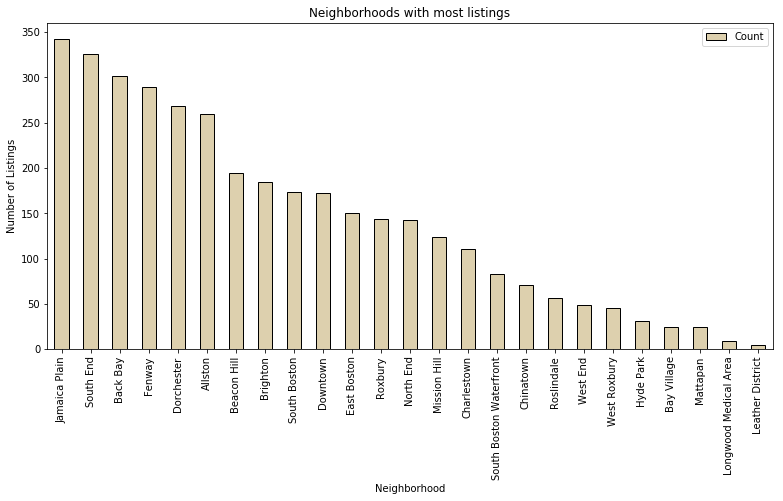

In [70]:
df_NeighborhoodMostListings = df.groupby(['neighbourhood_cleansed'])['neighbourhood_cleansed'].count().reset_index(name='Count').sort_values(by=['Count'], ascending=False)
print(df_NeighborhoodMostListings)

displayBarChart(df_NeighborhoodMostListings,'neighbourhood_cleansed', 'Count', 13, 6, 'Neighborhood', 'Number of Listings', 'Neighborhoods with most listings', False)  

### Speaking of most listings, here we try and get the list of neighborhood that have the most listings on the Airbnb Boston dataset. Jamaica Plain comes with most listings: 343, while Leather District has the least number of listings which turns out to be 5